# Mask R-CNN - Prediction


## Load library

In [19]:
from mrcnn.main import *
from mrcnn.utils import *
# Set path to Mask RCNN folder
ROOT_DIR = os.path.abspath(r"C:\Users\tr248228\MaskRCNN_cell")
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs4")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
from mrcnn.config import Config

## Load pretrained weights

In [20]:
model_path = r"C:\Users\tr248228\MaskRCNN_cell\logs4\cell20220130T2007\mask_rcnn_cell_0016.h5"

## Configuration for the prediction

Important parameters:

    DETECTION_MAX_INSTANCES: max number of cells can be predicted in the image
    RPN_ANCHOR_SCALES: Size of target cells
    

In [21]:
class InferenceConfig(CellConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_RESIZE_MODE = "pad64" # 'none' #
    DETECTION_MAX_INSTANCES = 3500 #3000
    DETECTION_MIN_CONFIDENCE = 0.7
    DETECTION_NMS_THRESHOLD = 0.20
    #ROI_POSITIVE_RATIO = 0.8
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    #MEAN_PIXEL = np.array([40,15,30])
    
    POST_NMS_ROIS_INFERENCE=12000 #15000

## Load Model

In [22]:
inference_config = InferenceConfig()
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)


model.load_weights(model_path, by_name=True)

## Prediction on training data

In [31]:
# train_images = sorted(glob.glob('./train/*crop.png'))
# train_masks = sorted(glob.glob('./train/*label.png'))

train_images = sorted((glob.glob("trainingData2/*Nuclei.jpg")))
train_masks = sorted((glob.glob("trainingData1/*Detections.tiff")))

# train_images = sorted((glob.glob("valData2/*Nuclei.jpg")))
# train_masks = sorted((glob.glob("valData1/*Detections.tiff")))
train_images

['trainingData2\\B32Nuclei.jpg',
 'trainingData2\\D35Nuclei.jpg',
 'trainingData2\\F11Nuclei.jpg',
 'trainingData2\\H32Nuclei.jpg',
 'trainingData2\\K27Nuclei.jpg',
 'trainingData2\\L28Nuclei.jpg',
 'trainingData2\\S10Nuclei.jpg',
 'trainingData2\\T37Nuclei.jpg',
 'trainingData2\\W14Nuclei.jpg']

Processing 1 images
image                    shape: (287, 273, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min:    0.00000  max:  255.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  int32
anchors                  shape: (1, 25575, 4)         min:   -0.28373  max:    1.08310  float32


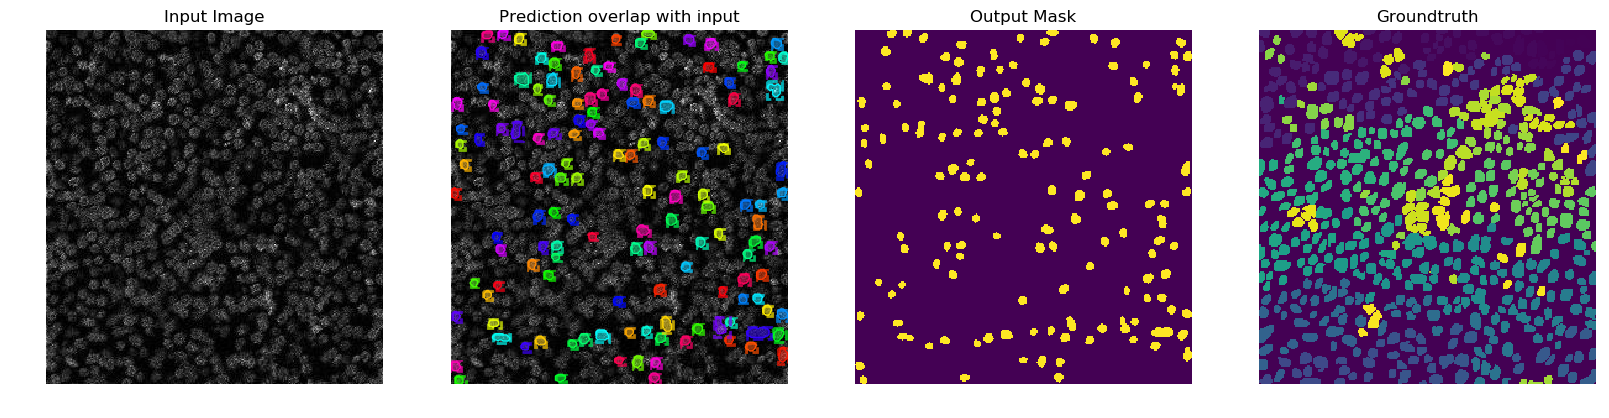

In [32]:
example_index=1
im = imageio.imread(train_images[example_index])
# im = np.reshape(im, (1, im.shape[0], im.shape[1]))
r = model.detect([im], verbose=1)[0]
plt.figure(figsize=(20,5),dpi=100)
ax1=plt.subplot(1,4,1)
plt.imshow(im)
plt.title('Input Image')
plt.axis('off')
ax2=plt.subplot(1,4,2)
visualize.display_instances_new(im, r['rois'], r['masks'], r['class_ids'], r['scores'], ax=ax2)
plt.title('Prediction overlap with input')
plt.axis('off')
plt.subplot(1,4,3)
mask = np.zeros(im.shape[:2])
for x in range(r['masks'].shape[2]):
    mask+= (r['masks'][:,:,x])
plt.imshow(mask>0)
plt.title('Output Mask')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(imageio.imread(train_masks[example_index]))
plt.title('Groundtruth')
plt.axis('off')
plt.show()


In [41]:
test_images = sorted(glob.glob("valData2/*Nuclei.jpg"))

Wall time: 0 ns
Processing 1 images
image                    shape: (282, 270, 3)         min:    0.00000  max:  242.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min:    0.00000  max:  242.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  int32
anchors                  shape: (1, 25575, 4)         min:   -0.28373  max:    1.08310  float32
Processing 1 images
image                    shape: (311, 320, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min:    0.00000  max:  255.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  320.00000  int32
anchors                  shape: (1, 25575, 4)         min:   -0.28373  max:    1.08310  float32


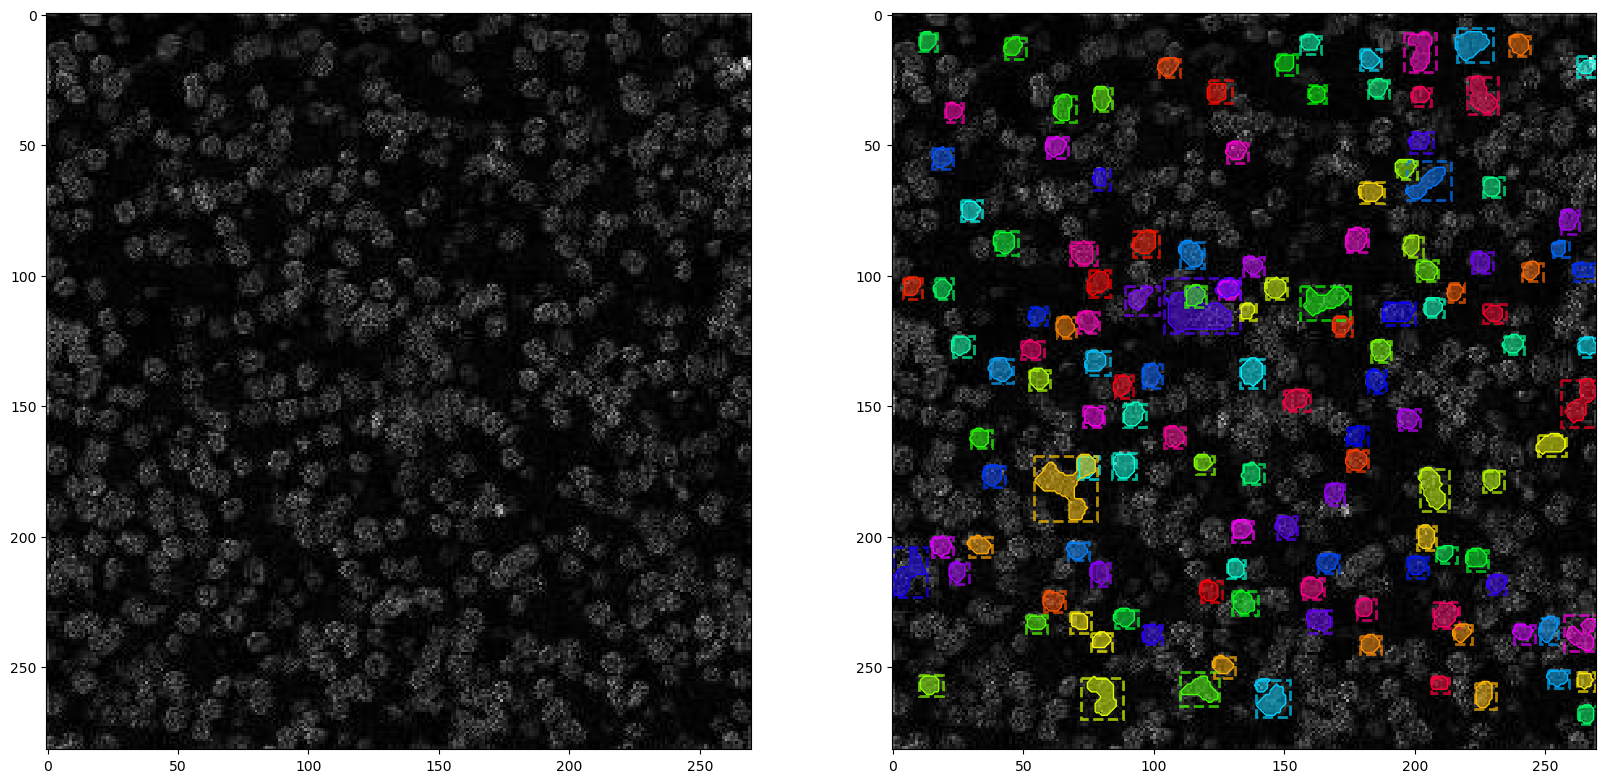

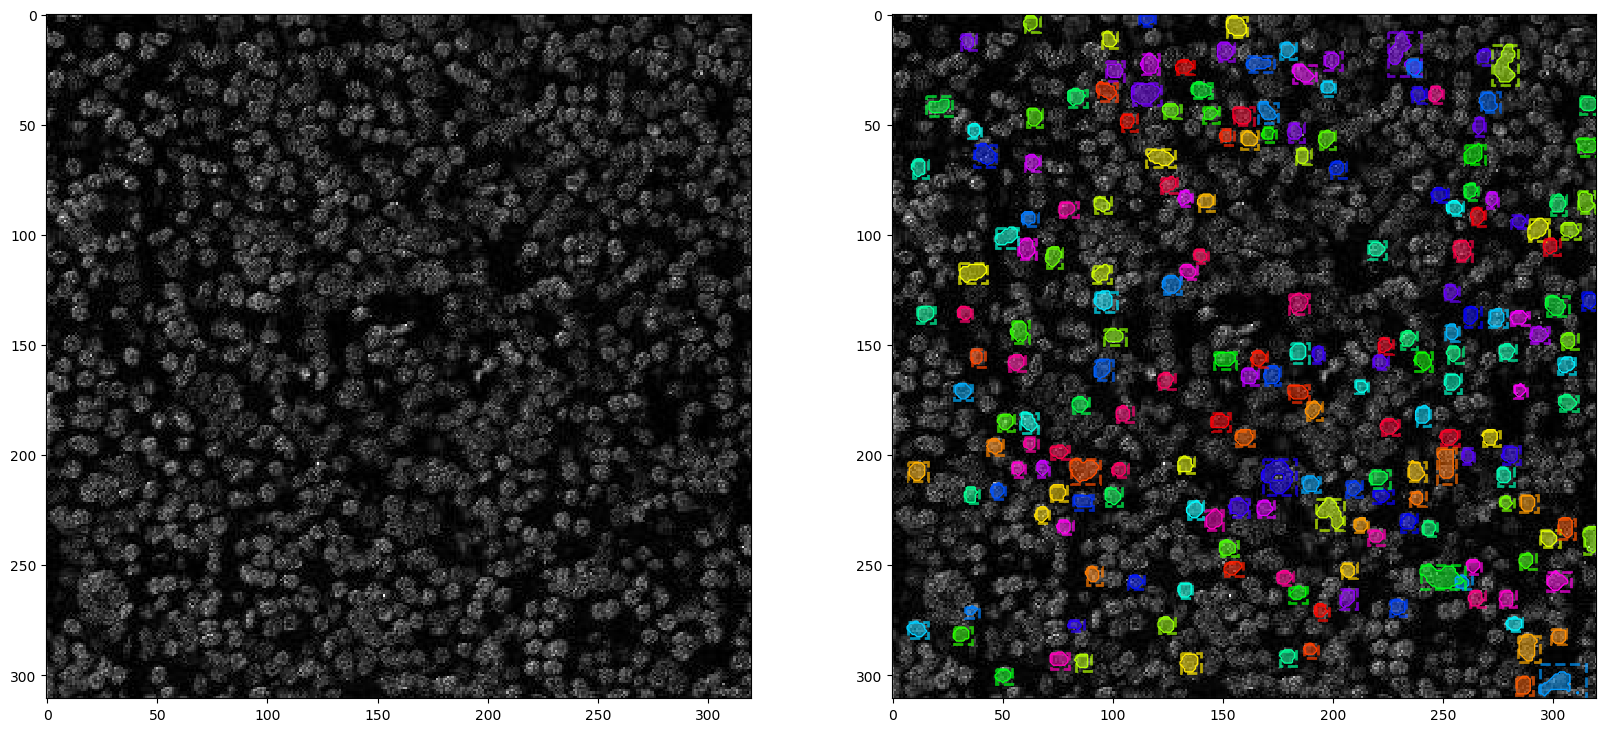

In [42]:
%time
for image in test_images:
    plt.figure(figsize=(20,10),dpi=100)
    im = imageio.imread(image)
    plt.subplot(1,2,1)
    plt.imshow(im)
    ax2=plt.subplot(1,2,2)
    r=results = model.detect([im], verbose=1)[0]
    visualize.display_instances_new(im, r['rois'], r['masks'], r['class_ids'], r['scores'], ax=ax2)
    